## Bike sharing EDA

#### Problem Statement-

Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from plotly.offline import iplot
#import plotly as py
#import plotly.tools as tls
#import cufflinks as cf

In [103]:
#py.offline.init_notebook_mode(connected=True)
#cf.go_offline()

In [104]:
# Reading the train data and parsing the date to make it data type: datetime 
#bike = pd.read_csv('train_bikes.csv', parse_dates=['datetime'])
bike = pd.read_csv('train_bikes.csv')

In [105]:
# To display the first five obervations of the dataset.
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [106]:
# To display the last five obeservations of the dataset.
bike.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [107]:
# Check howmay entries/data points and features/columns are there in the dataset
bike.shape

(10886, 12)

In [108]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [109]:
# TO get the 5-point summary of the dataset
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


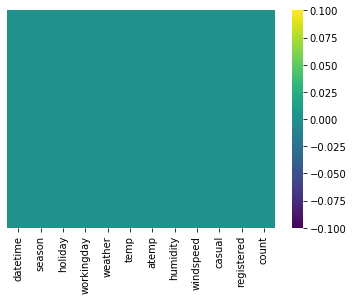

In [110]:
## A good way to check the null entries is to create a heatmap plot using seaborn
sns.heatmap(bike.isnull(), yticklabels = False, cmap='viridis')

In [111]:
## Another way to check the null entries in the dataset
bike.isnull().values.any()

False

#### Initial Observations:

The training dataset has 12 columns and 10886 entries. There are 11 numerical columns and 1 object columns present in the dataset. Based on the problem definition, count column is the label/dependent variable and other columns are features/independent variable. The given dataset doesn't contain any null entries in any of the columns.  

In [112]:
#bike.isnull()

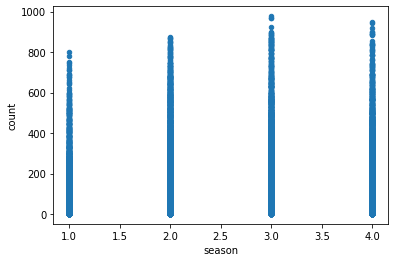

In [113]:
# Plotting count based on season
bike.plot.scatter(x='season', y='count')

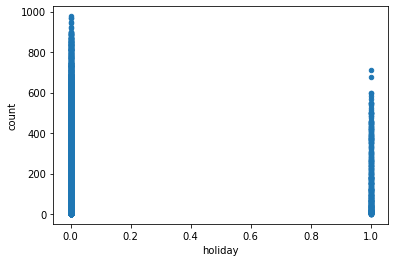

In [114]:
# Plotting count based on holiday
bike.plot.scatter(x='holiday', y='count')

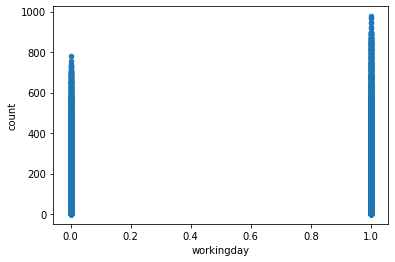

In [115]:
# Plotting count based on working day
bike.plot.scatter(x='workingday', y='count')

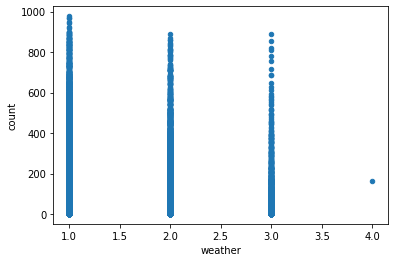

In [116]:
bike.plot.scatter(x='weather', y='count')

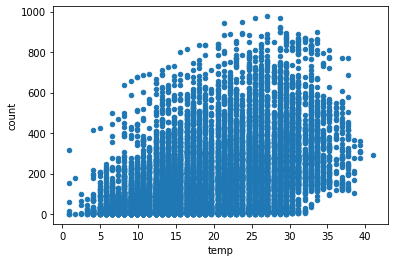

In [117]:
bike.plot.scatter(x='temp', y='count')

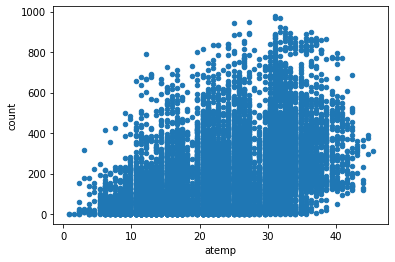

In [118]:
bike.plot.scatter(x='atemp', y='count')

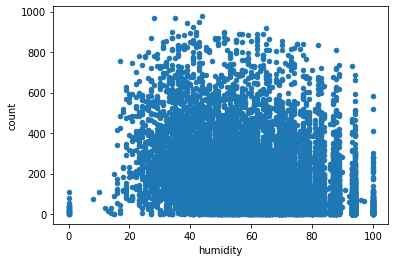

In [119]:
bike.plot.scatter(x='humidity', y='count')

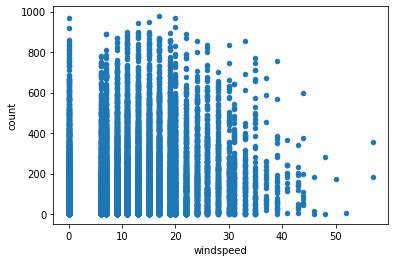

In [120]:
bike.plot.scatter(x='windspeed', y='count')

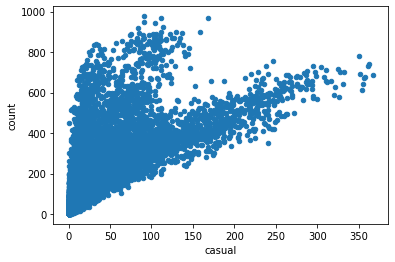

In [121]:
bike.plot.scatter(x='casual', y='count')

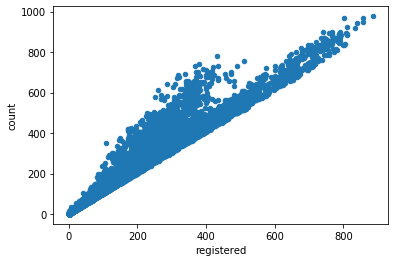

In [122]:
bike.plot.scatter(x='registered', y='count')

In [13]:
#!pip install pandas-profiling
#import pandas_profiling

  Using cached pandas-1.0.5-cp37-cp37m-win_amd64.whl (8.7 MB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached matplotlib-3.2.2-cp37-cp37m-win_amd64.whl (9.2 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=905bcd57124e47255a98e5e4e962d3c765eb7afc8df2e1c43591730f8ea4ad13
  Stored in directory: c:\users\prade\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=8ac9410b986b20a15262ac88ad3a3a4f64d448893120a025ac55388e9cf6e158
  Stored in directory: c:\users\prade\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin imagehash
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\prade\\anaconda3\\lib\\site-packages\\~andas\\_libs\\algos.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pandas_profiling'

C:\Users\prade\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # add a new item with the dtype setup
C:\Users\prade\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # reset the sliced object if unique


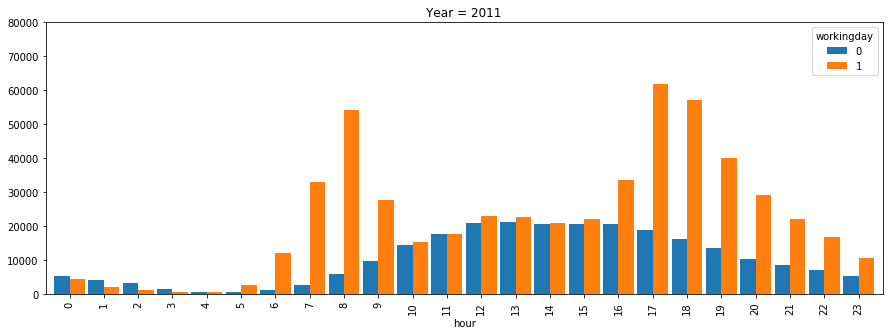

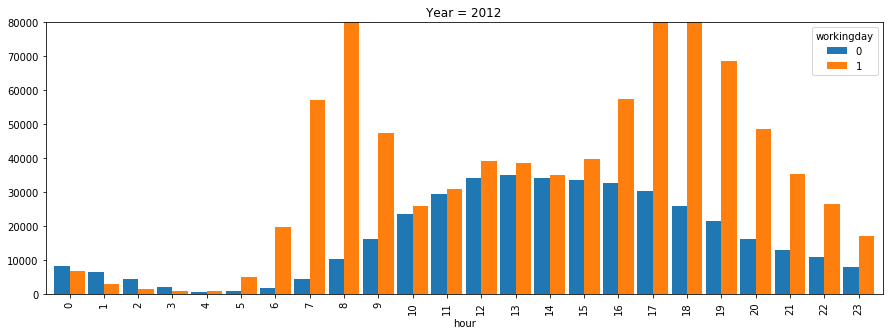

In [123]:
## Write a function to create plot for every hour bike hire count
def every_hour(data, year=None, agg='sum'):
    #dd = data
    if year: dd = data[pd.DatetimeIndex(bike.datetime).year == year] ## datetime is in 'object' form. Convert this into pandas Datetime index
    dd.loc[:,'hour'] = pd.DatetimeIndex(dd.datetime).hour
        
    by_hour = dd.groupby(['hour', 'workingday'])['count'].sum().unstack() # Creates dtaframe based on gouping by hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))

every_hour(bike, year=2011) # plotting the count plot based on hour for 2011 
every_hour(bike, year=2012) # plotting the count plot based on hour for 2012

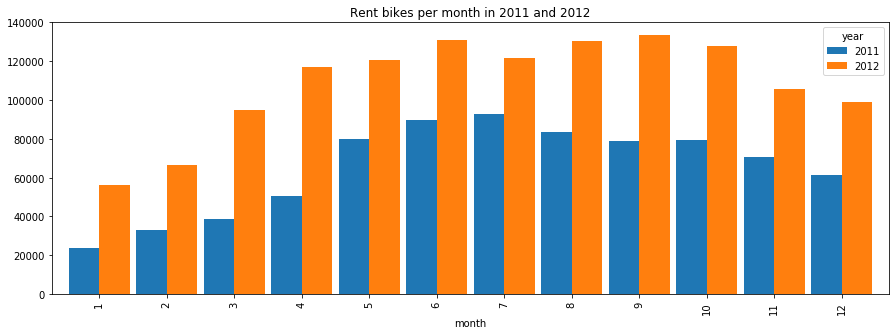

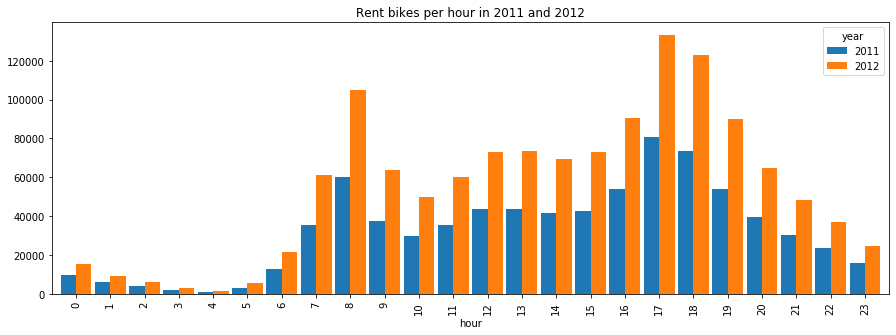

In [124]:
dd = bike.copy() 
dd['year'] = pd.DatetimeIndex(bike.datetime).year
dd['month'] = pd.DatetimeIndex(bike.datetime).month
dd['hour'] = pd.DatetimeIndex(bike.datetime).hour
by_year = dd.groupby(['month','year'])['count'].sum().unstack()
by_hour = dd.groupby(['hour','year'])['count'].sum().unstack()

by_year.plot(kind='bar', figsize=(15,5), width=0.9, title="Rent bikes per month in 2011 and 2012")
by_hour.plot(kind='bar', figsize=(15,5), width=0.9, title="Rent bikes per hour in 2011 and 2012")

In [125]:
# Function to plot a graph for count per hour
def plot_hours(data):
    counts = {}
    for hour in range(24):
        counts[hour] = data[data.hour == hour]['count'].values
    
    plt.figure(figsize=(20,10))
    plt.xlabel('Hours', fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.boxplot([counts[i] for i in counts])
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
    
    #return counts

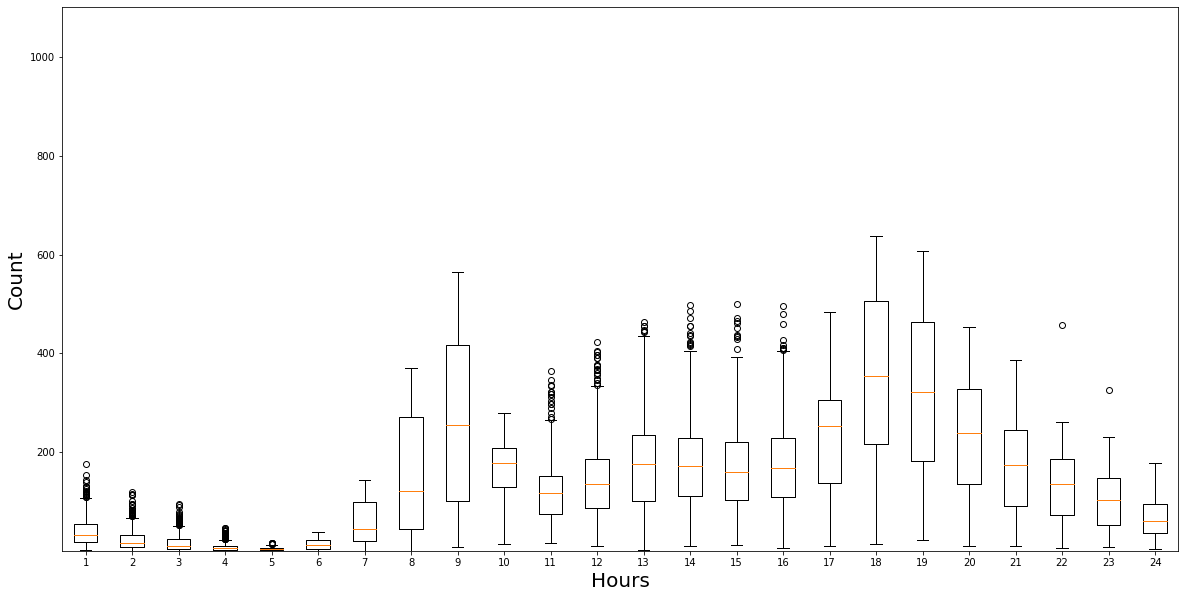

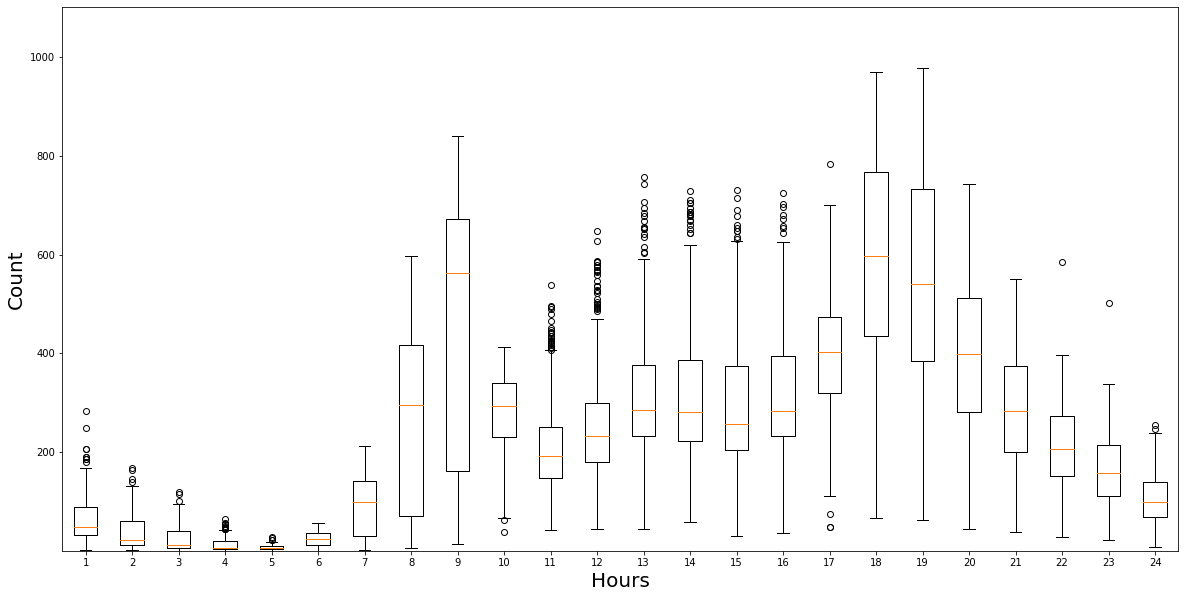

In [126]:
plot_hours(dd[dd.year == 2011]) # box plot for hourly count for the mentioned year
plot_hours(dd[dd.year == 2012]) # box plot for hourly count for the mentioned year

In [131]:
train = bike.copy()
dt = pd.to_datetime(train["datetime"])
#train['hour'] = dt.map(lambda x: x.hour)
train['datetime'] = pd.DatetimeIndex(bike.datetime)
train['hour'] = train.datetime.dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


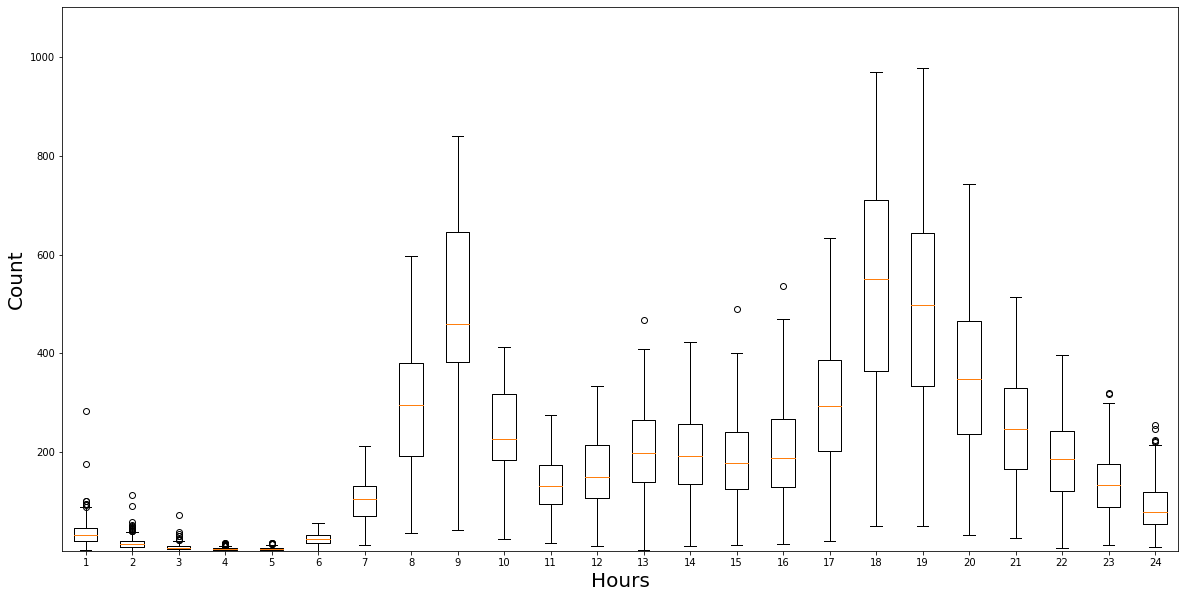

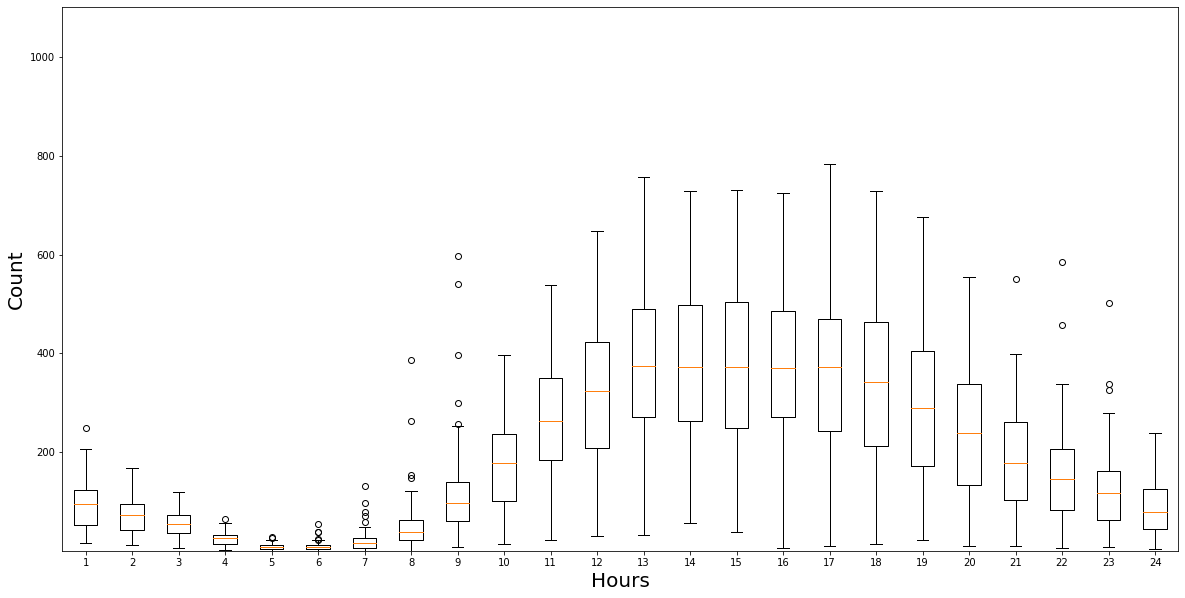

In [132]:
plot_hours(train[train.workingday == 1]) # box plot for hourly count for the mentioned year
plot_hours(train[train.workingday == 0]) # box plot for hourly count for the mentioned

In [ ]:
## Method to convert categorical data to numerical data

In [146]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [133]:
test = pd.read_csv('test_bikes.csv') # loading the test data

In [178]:
test['datetime'] = pd.DatetimeIndex(test.datetime)
test['hour'] = test.datetime.dt.hour
X_test = test.drop(['datetime'], axis=1)

In [189]:
test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,22


In [136]:
train_fit = train[test.columns]

In [190]:
list_c = list(test.columns)
list_c.append('count')
train_fit = train[list_c]
train_fit = train_fit.drop('datetime', axis = 1)

In [191]:
train_fit

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count
0,1,0,0,1,9.84,14.395,81,0.0000,0,16
1,1,0,0,1,9.02,13.635,80,0.0000,1,40
2,1,0,0,1,9.02,13.635,80,0.0000,2,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,13
4,1,0,0,1,9.84,14.395,75,0.0000,4,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,336
10882,4,0,1,1,14.76,17.425,57,15.0013,20,241
10883,4,0,1,1,13.94,15.910,61,15.0013,21,168
10884,4,0,1,1,13.94,17.425,61,6.0032,22,129


In [212]:
train_fit.groupby(['hour','workingday'])['count'].mean().unstack()

workingday,0,1
hour,,
0,94.489655,36.732258
1,71.910345,16.003236
2,53.748252,8.436066
3,25.534722,4.892734
4,8.544828,5.363636
5,9.373239,24.529032
6,19.993103,102.577419
7,47.268966,290.690323
8,112.255172,479.945161


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train = train_fit.iloc[:,0:-1]
y_train = train_fit.iloc[:,-1]

In [196]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,0,1,9.84,14.395,81,0.0000,0
1,1,0,0,1,9.02,13.635,80,0.0000,1
2,1,0,0,1,9.02,13.635,80,0.0000,2
3,1,0,0,1,9.84,14.395,75,0.0000,3
4,1,0,0,1,9.84,14.395,75,0.0000,4
...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19
10882,4,0,1,1,14.76,17.425,57,15.0013,20
10883,4,0,1,1,13.94,15.910,61,15.0013,21
10884,4,0,1,1,13.94,17.425,61,6.0032,22


In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [206]:
y_pred = forest_reg.predict(X_test)
forest_reg.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [200]:
score = cross_val_score(forest_reg, X_train, y_train, cv=4) # calcuating the cross validation score
print (score)

[0.10820451 0.30072403 0.58058271 0.65253011]
